# Welcome to Week 3, Part 2 - Linear Regression
<hr/>

In our last workshop, we talked about taking some continuous data, such as features about houses, and clustering them into classes, such as neighborhoods. 

While these classes themselves can be represented continuously (by their centroids), the idea of classes is discrete. For example, if our features are _```square feet```_ and _```home value```_, when we examine our clusters, we may see that our _```downtown```_ centroid is $[850, 925 000]$. These are continuous values; however, we have a set number of clusters in total (K of them!), making our output discrete.

Now, say we have some more continuous data, but we're looking for continuous output, as well. This is where you'll find linear regression to be useful.

## Breaking down the words

Just as "K-Means Clustering" sounded complicated, let's once again break down the terminology to understand the meaning of "Linear Regression."

### Linear

All this means is that the relationship between our variables, when plotted, will be in the form of a straight(ish!) line. Think back to $y = mx + b$. Not only is that a great example of a linear relationship, it's actually the only thing we're calculating (more on that later). You may see a linear relationship between variables like "time studied" and "course grade." 
 
This is in contrast to quadratic relationships $y = x^2$, which may be seen between variables such as the height of a thrown ball, and the time after which it was thrown. Linear relationships can also take the form of $y = x^3$, $y = x^5$, and so on, though we won't be covering that today.


### Regression

This may be a word you haven't seen before - and that's okay! Normally, in school, a (very, very basic) question would ask you, 

>_"Given the equation $y = 3x - 5$, what is the value of y when x is 9?"_

However, we're going to flip this question around. Instead, we're now asking:

>_"Given this .csv full of x and y values, what is the equation for $y = mx + b?$

The formal definition of regression, from a quick google search, is:

>"A return to a former or less developed state."

When you think about it, we're converting our data from many x and y values, to a _less developed_ state; an equation! That's essentially all regression is.

## How do I use it?

Let's just get this out of the way now.

$$ y = bx + a $$
$$ $$
$$ where... $$
$$ $$
$$ b = \frac{n\sum xy - (\sum x\sum y)}{n\sum x^2 - (\sum x)^2} $$
$$ $$
$$ and... $$
$$ $$
$$ a = \hat y - b\hat x $$

Oof. That's ugly. There's a lot to go over here, so let's go step by step.

### a and b?

When calculating linear regression, convention is to use the form $y = bx + a$ rather than $y = mx + b$. Feel free to replace _a_ and $b$ with any of the other letters of the alphabet not in use in our equation, it's simply a placeholder. 

### What's wrong with that E? 

That's not a normal E; that's the Greek symbol Sigma, used to define _summation notation_. Aside from rhyming neatly, summation notation is useful because it lets us save a lot of time writing. Rather than writing $x_{0} + x_{1} + x_{2} ...$ and so on, we can simply use Sigma to instruct us to take the sum of all x values.  You can actually think of the Sigma like a for loop: ```for x in our data: total = total + x```

### Why do those x and y's have hats?

These hats, as they're commonly referred to, are used to denote taking an average.

### Seriously, why does this even work?

Asking "why" is always the right thing to do; it's always vital to understand what you're doing. However, an in-depth explanation of the linear regression formula involves some knowledge of calculus that we won't assume during these workshops. If you're interested in specifically what each term of the equation is doing, then I encourage you to check out [this PDF](http://coccweb.cocc.edu/srule/MTH244/other/LRJ.PDF) for a more involved explanation. For the purpose of not assuming everyone is fully proficient in calculus, though, we're going to stick to a more intuitive idea of why this formula works. 

#### The Line of Best Fit

Let's go back to _y = mx + b_ for a moment, our core concept. All our equation of a line represents is a line of best fit; the line that can most effectively represent - or, **estimate** - our data. But how do we define "representing our data?" The standard heuristic is to try to divide all of our points so that half are on one side of the line, and half are on the other. Does that best represent our data?

![lineofbestfit](http://www.bbc.co.uk/staticarchive/5932b02ab2c561a61cac4e6b45b23ba4b31be72b.gif)
(BBC)

Here we see some pretty linear data, and a line through it that looks like it pretty much divides our data evenly. How can we be sure, though, that this is best representing our data? What if we had some data whose line perfectly divided it in half, but one half was extremely close to the line, and one extremely far away? We need a mathematical way to understand "best fit."

#### Squared Error

We can think about representing our data as the idea that our line should be as close as possible to every single point. How, though, do we represent the distance from our line to each point? Well, at each x value, we could simply subtract our data's y value from the y value of our line (our **estimate**). Or, mathematically:

>Take the ordered pair $(4, 16)$ and the line of best fit as $f(x) = 3x+9$. Calculate the error. <br/>
>$f(4) = 3(4) + 9 = 21$ <br/>
>$y = 16$ <br/>
>error = $f(4) - y = 21 - 16 = 5$

However, there's a problem with this method. Let's say we have three points in our dataset, and their errors are $[-6, 2, 4]$. What if we wanted to ask, "What's the total amount our line is off by?" Presumably, we would add them up: $-6 + 2 + 4 = $ ... zero! According to this, the total amount our line is off is absolutely 0, even though our points were off by -6, 2, and 4! This makes absolutely no sense.

To counteract this weird little quirk, then, we take the **squared error**. This is, quite literally, taking the error we just calculated and squaring it. We do this because now, whenever we encounter negative error, it will be multiplied by itself, forcing it to be positive. This means that when we add up our errors, it won't be able to sum to 0 anymore (cause there are no negative numbers). Let's try it:

>Errors: $[-6, 2, 4]$ <br/>
>Sum of errors: $-6 + 2 + 4 = 0$ <br/>
>Squared errors: $[36, 4, 16]$ <br/>
>Sum of squared errors: $36 + 4 + 16 = 56$

Much better. If you notice, this also has the effect of emphasizing larger error values. This can be both a good thing and a bad thing. 

#### Putting it all together 

So we know that our line of best fit should minimize the distance between each point and that line, and we also know that the way to define "distance" is by using squared error. So what we're really looking to do is **minimize the squared error.** How do we do that? Well, minimization is a concept you'll hear quite a lot about in calculus, but it's simply beyond the scope of this workshop. Following linear regression, however, I've included another component to this tutorial that not only gives us a way to do this with essentially zero calculus, it also builds on this idea of minimizing error to introduce some of the concepts that lay the foundation for many data science techniques used today. 

In summary, if you take anything away from this workshop, let it be that **the idea of linear regression is simply minimizing error to make our line of best fit as accurate as possible**. There are a number of ways you can define error beyond our squared error, but the concept remains the same.

## How do we know how accurate it is?

By using another fun formula!

### Correlation Coefficient

$$ r = \frac{n(\sum xy) - (\sum x\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 -(\sum y)^2]}} $$

Brutal, I know, but bear with me. This is called the **correlation coefficient**. This value, referred to as _r_, is a measure of the strength of the relationship between two variables. Your _r_ value will range between -1 and 1.

Interpreting the _r_ value can be a bit tricky. I find it makes it much easier to separate the sign from the value. So, the absolute value of _r_ (just the number, forget about the +/- sign) will represent the _strength_ of the relationship. The closer this value is to 1, the stronger the relationship - the variables are very closely related. The closer this value is to 0, the weaker the relationship - the variables have almost nothing to do with each other.

Now we can bring in the sign of the value (positive or negative). If the sign is positive, that means that there is a _positive correlation_. We can think about a positive correlation as, "as x increases, y also tends to increase." The opposite is true for when the sign is negative, or there is a _negative correlation_. In this case, as x increases, y tends to _decrease_. 

Take, once again, time studied versus course grade. Pretend we've done a study and gathered data on students. Assume that our _r_ value is $0.76$. We see that the value is 0.76, which is quite strong, and that the sign is positive. This means that as time studied increases, grades also tend to increase quite closely. 

Now, let's compare absences to course grade. In our fake study, we've found that the _r_ value is -0.41. The value is 0.41, which indicates that the values are fairly closely related. Our sign is negative, which means that as absences increase, grades tend to _decrease_. 

### Coefficient of Determination

We can also look at a value we label as _r<sup>2</sup>_, called the coefficient of determination. What this value represents is how well our regression's line of best fit predicts our actual _y_ values. 

_r<sup>2</sup>_ is the easiest thing we've calculated so far. It's literally _r_... squared! Remember that _r_ can be between $[-1, 1]$, so when we square this, our _r<sup>2</sup>_ value must be between $[0, 1]$. This is because when we square a negative number, it will become positive. 

_r<sup>2</sup>_ is simply a measure of the predictive ability of our model.

## Can we get to programming already?

Sounds good to me.

<hr/>
## Programming Linear Regression

Let's import all of our usual packages.

In [2]:
from math import sqrt #for taking the square root in our r formula
import pandas as pd #pandas as always
import numpy as np #numpy as always

#make our notebooks appear inline
%matplotlib inline 
from IPython.display import display #viewing dataframes
import matplotlib.pyplot as plt #matplotlib for graphs
from pandas.plotting import scatter_matrix #see relationships between our variables
plt.style.use('fivethirtyeight') #make our graphs look pretty

For this tutorial, I've prepared some air quality data to use. There are a lot of values in this dataset but we're only going to be focusing on a few important ones:

**Legend** <hr/>
**CBSA** - Core-Based Statistical Area; basically just a geographical area <br/>
**Days with AQI** - Number of games where AQI was recorded <br/>
**Good Days** - Number of days with good air quality <br/>
**Max AQI** - The largest AQI recorded  <br/>
**90th Percentile AQI** - The 90th percentile value of AQI <br/>
**Median AQI** - The median value of AQI <hr/>
We're also going to want to make a new row called "Good Days Percent" which contains the percent of recorded days that were 'Good Days'.

In [60]:
data = pd.read_csv('annual_aqi_by_cbsa_2018.csv')
data['Good Days Percent'] = data['Good Days'] / data['Days with AQI']
display(data.head(5))

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Good Days Percent
0,"Aberdeen, WA",10140,2018,31,30,1,0,0,0,0,57,38,26,0,0,0,0,31,0,0.967742
1,"Akron, OH",10420,2018,90,71,19,0,0,0,0,79,60,37,0,0,27,0,63,0,0.788889
2,"Albany, GA",10500,2018,59,44,15,0,0,0,0,79,64,29,0,0,0,0,59,0,0.745763
3,"Albany-Schenectady-Troy, NY",10580,2018,90,69,21,0,0,0,0,78,60,40,0,0,52,0,38,0,0.766667
4,"Alexandria, LA",10780,2018,28,26,2,0,0,0,0,54,49,27,0,0,0,0,28,0,0.928571


Now that we've loaded our data, let's try to visualize it to look for some relationships. Most people will probably want to know how often they can expect good air quality so it's a good idea to start there.

Let's look for the 'Good Days Percent' row, and scan across it for any linear-looking plots.

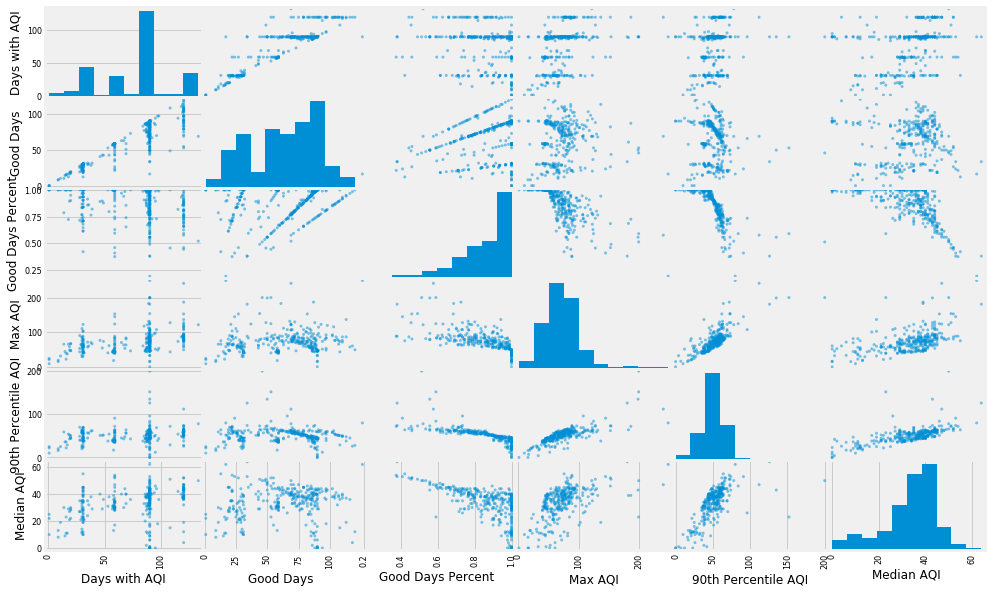

In [61]:
# scatter_matrix(data.loc[:,'Days with AQI':'Median AQI']);
scatter_matrix(data[['Days with AQI', 'Good Days', 'Good Days Percent', 'Max AQI', '90th Percentile AQI', 'Median AQI']], figsize = (15,10));

As we can see here, it seems that the percentage of good days looks to have a pretty linear relationship with median AQI. So, we should be able to use median AQI to predict the percentage of good days - and we do that with a linear regression! 

Let's narrow our data to just what we care about; differential, and win percentage. We're also going to do something extremely important: **split our data into training and testing copies.** It is extremely important that you do this, to prevent something called **overfitting.**

When you study for a test, do you memorize how to do the specific questions from the textbook, or do you learn the concepts and how to solve any kind of problem in that concept? I'd hope the latter, because the former is an example of overfitting. You're overfitting your "model" (your brain) to only be able to "predict" (answer) the specific questions, rather than truly learning the "data" (concept). We'll take the first half of the elements from data to train our model.

,CBSA,Median AQI,Good Days Percent
0,"Aberdeen, WA",26,0.967742
1,"Akron, OH",37,0.788889
2,"Albany, GA",29,0.745763
3,"Albany-Schenectady-Troy, NY",40,0.766667
4,"Alexandria, LA",27,0.928571


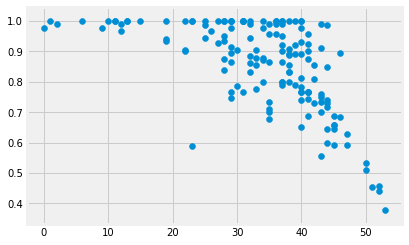

In [68]:
pred = data[['CBSA', 'Median AQI','Good Days Percent']].copy()[:150]
display(pred.head(5))
plt.scatter(pred['Median AQI'],pred['Good Days Percent'])

Note that the following is technically unnecessary, but I find it helpful when doing linear regression by hand.

Going back to our original equation, we have 6 terms that we'll be using. I like to create a table of them for reference.

In [69]:
names = ['X', 'Y', 'XY', 'X^2', 'Y^2', 'N']
values = [np.sum(pred['Median AQI']), np.sum(pred['Good Days Percent']), np.sum(pred['Median AQI'] * pred['Good Days Percent']), np.sum(pred['Median AQI']**2), np.sum(pred['Good Days Percent']**2), len(pred)]

pd.DataFrame(values, names)

,0
X,5082.000000
Y,128.454894
XY,4213.205327
X^2,188798.000000
Y^2,113.098515
N,150.000000


And with that, let's jump right in. We'll calculate our terms, and plug them into the formula. We'll go back to $y = mx + b$ form as we're likely all more familiar with it.

In [71]:
def linear_regression(x, y):
    '''
    Let's define all the variables we need in our slope formula.
    Sigma (sum) for X, Y, XY, X^2, Y^2, as well as n (the length of our data).
    '''
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)
    x2_sum = np.sum(x**2)
    y2_sum = np.sum(y**2)
    n = len(x)
    
    #Calculate the slope of our line y=mx+b
    m = (n*xy_sum - x_sum*y_sum) / (n*x2_sum - x_sum**2)
    
    '''
    Calculate the average of X and Y for calculating B
    '''
    x_avg = np.mean(x)
    y_avg = np.mean(y)
    
    #Calculate the intercept of our line y=mx+b
    b = y_avg - m * x_avg

    #Print our line
    print("y =",m,"x +",b)
    
    #Use our existing values to compute R, which in turn gives us R^2
    r = (n*xy_sum - x_sum*y_sum) / sqrt((n*x2_sum - (x_sum**2))*(n*y2_sum - y_sum**2))
    r2 = r**2
    
    print("R: ", r)
    print("R^2: ", r2)
    
    return m, b #Return np array of predicted points

x = pred['Median AQI']
y = pred['Good Days Percent']

m, b = linear_regression(x, y)

('y =', -0.008354260964516637, 'x +', 1.1394083213087545)
('R: ', -0.6122842819618475)
('R^2: ', 0.37489204193753517)


Excellent! We now have our line of best fit. We see that our _r_ and _r<sup>2</sup>_ values show that the relationship between point differential is quite strong for our testing data. Now, let's make some predictions on our testing data to make sure that our model can perform well with new data.

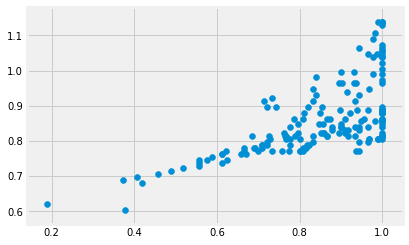

In [72]:
test = data[['CBSA', 'Median AQI','Good Days Percent']].copy()[150:]
predictions = m*test['Median AQI'] + b

plt.scatter(test['Good Days Percent'], predictions);

Awesome! It looks like our model did a really good job of capturing the relationship between our variables, and was able to prevent overfitting.

## Conclusions - kind of

That is, at it's heart, linear regression. You're attempting to create a line of best fit with **as little error as possible** between your x and y values. There's a _lot_ of work involved, though, and it's not very scalable; how often are you going to have one variable so neatly predict another? And how often are you going to use that to make interesting insights?

While you now know linear regression, there's another, very similar concept that some of you may find useful. If you'd like to simply stick to linear regression and call it a day, I don't blame you, and you can exit out here. 

However, if you're interested, keep reading to learn about a method very similar to linear regression that lays the foundation for many modern data science techniques. This method is **Gradient Descent.** If you're interested in learning more about this, stay tuned for an upcoming workshop!